# Exploratory Data Analysis - Telegram Medical Data

## Task 1: Data Scraping Analysis

This notebook explores the raw Telegram data scraped from Ethiopian medical channels.

In [31]:
# Import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import plotly.express as px
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Load and Explore Raw Data

In [39]:
# Path to raw data
raw_data_path = Path("../data/raw/telegram_messages")

# Find all JSON files
json_files = list(raw_data_path.rglob("*.json"))
print(f"Total JSON files found: {len(json_files)}")
print(f"First 5 files:")
for file in json_files[:5]:
    print(f"  - {file.relative_to(raw_data_path.parent.parent)}")

Total JSON files found: 101
First 5 files:
  - raw\telegram_messages\2022-09-05\chemed123.json
  - raw\telegram_messages\2022-09-06\chemed123.json
  - raw\telegram_messages\2022-09-07\chemed123.json
  - raw\telegram_messages\2022-09-10\chemed123.json
  - raw\telegram_messages\2022-09-16\chemed123.json


In [40]:
# Function to load all JSON data
def load_all_messages():
    """Load all messages from JSON files"""
    all_messages = []
    
    for json_file in json_files:
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
                all_messages.extend(data)
        except Exception as e:
            print(f"Error loading {json_file}: {e}")
    
    return pd.DataFrame(all_messages)

# Load data
df = load_all_messages()
print(f"Total messages loaded: {len(df):,}")
print(f"Columns: {list(df.columns)}")

Total messages loaded: 1,071
Columns: ['message_id', 'channel_name', 'message_date', 'message_text', 'has_media', 'views', 'forwards', 'reactions', 'image_path', 'media_type', 'scraped_at', 'hashtags', 'mentions', 'urls', 'message_length', 'has_links', 'has_hashtags', 'has_mentions']


## 2. Basic Data Overview

In [43]:
# Display basic info
print("\n=== DATA OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData Types:")
print(df.dtypes)

print("\nFirst 3 messages:")
pd.set_option('display.max_colwidth', 100)
display(df[['channel_name', 'message_date', 'message_text', 'views', 'forwards']].head(15))


=== DATA OVERVIEW ===
Shape: (1071, 18)

Data Types:
message_id         int64
channel_name      object
message_date      object
message_text      object
has_media           bool
views              int64
forwards           int64
reactions         object
image_path        object
media_type        object
scraped_at        object
hashtags          object
mentions          object
urls              object
message_length     int64
has_links           bool
has_hashtags        bool
has_mentions        bool
dtype: object

First 3 messages:


,channel_name,message_date,message_text,views,forwards
0,@CheMed123,2022-09-05T10:02:05+00:00,,427,1
1,@CheMed123,2022-09-05T09:57:09+00:00,www.chemeds.org መድሀኒትዎን ለማግኘት ዘመናዊው መንገድ ነው፡፡ በድረገጻችን አማካኝነት መድኃኒትዎን ከፈለጉት ቦታ ይዘዙ ያሉበት ቦታ መድሃኒትዎ...,432,9
2,@CheMed123,2022-09-06T04:26:15+00:00,www.chemeds.org መድሀኒትዎን ለማግኘት ዘመናዊው መንገድ ነው፡፡ በድረገጻችን አማካኝነት መድኃኒትዎን ከፈለጉት ቦታ ይዘዙ ያሉበት ቦታ መድሃኒትዎ...,533,6
3,@CheMed123,2022-09-07T09:16:40+00:00,Why spend time searching for medications? Visit www.chemeds.org to have your medication delivere...,604,3
4,@CheMed123,2022-09-10T15:55:25+00:00,🌼🌼🌼 መልካም አዲስ ዓመት 🌼🌼🌼\n\nየምስራች!! በአዲሱ አመት አዲስ ነገር ለጤናዎ፡፡ ከእንግዲህ መድሃኒት ፍለጋ መንከራተትና መሰለፍ አይኖርብዎትም፡፡...,614,2
5,@CheMed123,2022-09-16T07:42:31+00:00,Say goodbye to the hustle of trying to find medications! \n\nChemed has brought to you the moder...,1101,15
6,@CheMed123,2022-09-28T05:45:31+00:00,CheMed\n#አፋላጊ\n#አድራሽ\n#አስታዋሽ\n\nwww.chemeds.org\n+2519603463,498,2
7,@CheMed123,2022-09-30T07:33:42+00:00,For more information contact our pharmacists at 0912603463\n\nYou can still schedule orders and ...,480,1
8,@CheMed123,2022-10-03T05:16:30+00:00,መድሀኒት ቤትዎ ድረስ! \n\nመድሀኒት በመፈለግ ጊዜዎንና ጉልበትዎን አያባክኑ:: ድረገጻችንን በመጠቀም መድኃኒት ከፈለጉት ቦታ ይዘዙ ያሉበት ቦታ እናደ...,503,3
9,@CheMed123,2022-10-06T09:23:46+00:00,በቀን ሁለት ጊዜ፣ ሶስት ጊዜ ወይም አራት ጊዜ መድሃኒት ሲታዘዝልን አንዴት መዉሰድ ይኖርብናል? \n\n\nwww.chemeds.org \n0912603463,474,3


In [44]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
display(missing_df[missing_df['Missing Count'] > 0])


=== MISSING VALUES ===


,Missing Count,Missing %
image_path,325,30.35
media_type,321,29.97


## 3. Channel Analysis

=== MESSAGES PER CHANNEL ===
channel_name
@lobelia4cosmetics    500
@tikvahpharma         499
@CheMed123             72
Name: count, dtype: int64


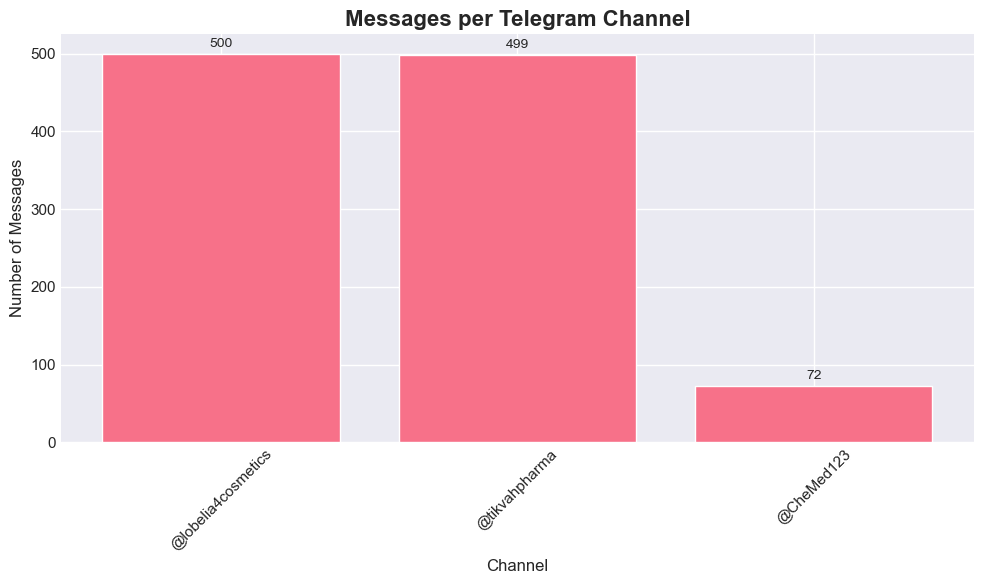

In [45]:
# Messages per channel
print("=== MESSAGES PER CHANNEL ===")
channel_stats = df['channel_name'].value_counts()
print(channel_stats)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_stats.index, channel_stats.values)
plt.title('Messages per Telegram Channel', fontsize=16, fontweight='bold')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


=== MESSAGES OVER TIME ===


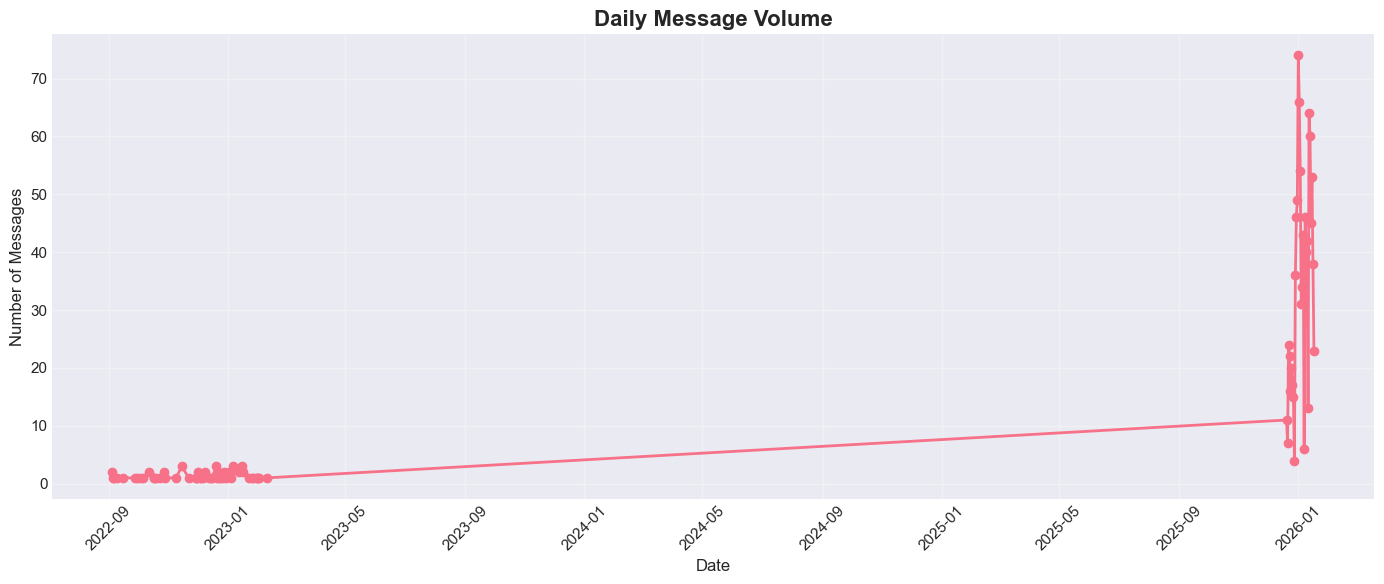

In [46]:
# Convert message_date to datetime
df['message_date'] = pd.to_datetime(df['message_date'])
df['date'] = df['message_date'].dt.date
df['hour'] = df['message_date'].dt.hour
df['day_of_week'] = df['message_date'].dt.day_name()

# Messages over time
print("\n=== MESSAGES OVER TIME ===")
daily_counts = df.groupby('date').size()

plt.figure(figsize=(14, 6))
daily_counts.plot(kind='line', marker='o', linewidth=2)
plt.title('Daily Message Volume', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Engagement Metrics Analysis

In [47]:
# Engagement statistics
print("=== ENGAGEMENT METRICS ===")

# Views and forwards by channel
engagement_stats = df.groupby('channel_name').agg({
    'views': ['mean', 'median', 'max', 'sum'],
    'forwards': ['mean', 'median', 'max', 'sum']
}).round(2)

print("\nEngagement by Channel:")
display(engagement_stats)

# Top 10 most viewed messages
print("\nTop 10 Most Viewed Messages:")
top_views = df.nlargest(10, 'views')[['channel_name', 'message_date', 'message_text', 'views', 'forwards']]
display(top_views)

=== ENGAGEMENT METRICS ===

Engagement by Channel:


views                        forwards                 
                       mean median    max      sum     mean median max   sum
channel_name                                                                
@CheMed123          1493.15  769.0  15051   107507     3.33    2.0  15   240
@lobelia4cosmetics   403.91  335.5   3295   201957     0.97    1.0  21   483
@tikvahpharma       2782.23  762.0  37908  1388331     6.14    1.0  54  3063


Top 10 Most Viewed Messages:


,channel_name,message_date,message_text,views,forwards
154,@tikvahpharma,2025-12-25 16:26:45+00:00,**#OBGYN_Ultrasound_Training****\n****@Hawassa****(OBGYN)📌\n****#ከ_ጥር_4_ጀምሮ****(****#Accredited*...,37908,32
164,@tikvahpharma,2025-12-25 06:21:01+00:00,**#OBGYN_Ultrasound_Training****\n****@Hawassa****(OBGYN)📌\n****#ከ_ጥር_4_ጀምሮ****(****#Accredited*...,37908,32
174,@tikvahpharma,2025-12-26 12:52:21+00:00,**#OBGYN_Ultrasound_Training****\n****@Hawassa****(OBGYN)📌\n****#ከ_ጥር_4_ጀምሮ****(****#Accredited*...,37908,32
398,@tikvahpharma,2026-01-01 16:26:32+00:00,**#OBGYN_Ultrasound_Training****\n****@Hawassa****(OBGYN)📌\n****#ከ_ጥር_4_ጀምሮ****(****#Accredited*...,37908,32
73,@tikvahpharma,2025-12-20 14:45:37+00:00,**#Basic_Abdominal_Ultrasound_Training****\n****@ADISSABABA**** \n****#ከ_ታህሳስ_12_ጀምሮ**** _ይሰጣል!\...,33061,19
85,@tikvahpharma,2025-12-21 09:48:04+00:00,**#Basic_Abdominal_Ultrasound_Training****\n****@ADISSABABA**** \n****#ከ_ታህሳስ_12_ጀምሮ**** _ይሰጣል!\...,33061,19
144,@tikvahpharma,2025-12-24 07:32:11+00:00,**#Basic_Abdominal_Ultrasound_Training****\n****@ADISSABABA**** \n****#ከ_ታህሳስ_12_ጀምሮ**** _ይሰጣል!\...,33061,19
558,@tikvahpharma,2026-01-04 12:25:45+00:00,#የሞያ_ፈቃድ_ለማሳደስ_CPD_ይመዝገቡ(CPD_አሁን_ይመዝገቡ)\n\nTraining Title= GENDER BASED VIOLENCE \n\n**🔶15CEU**\...,31199,28
689,@tikvahpharma,2026-01-08 06:23:38+00:00,#የሞያ_ፈቃድ_ለማሳደስ_CPD_ይመዝገቡ(CPD_አሁን_ይመዝገቡ)\n\nTraining Title= GENDER BASED VIOLENCE \n\n**🔶15CEU**\...,31199,28
581,@tikvahpharma,2026-01-05 15:27:21+00:00,**#Basic_Abdominal_Ultrasound_Training****\n****@ASOSA****\n****#ከ_ጥር_27_ጀምሮ**** _ይሰጣል!\n\n🔶🔶🔶🔶🔶...,31140,14


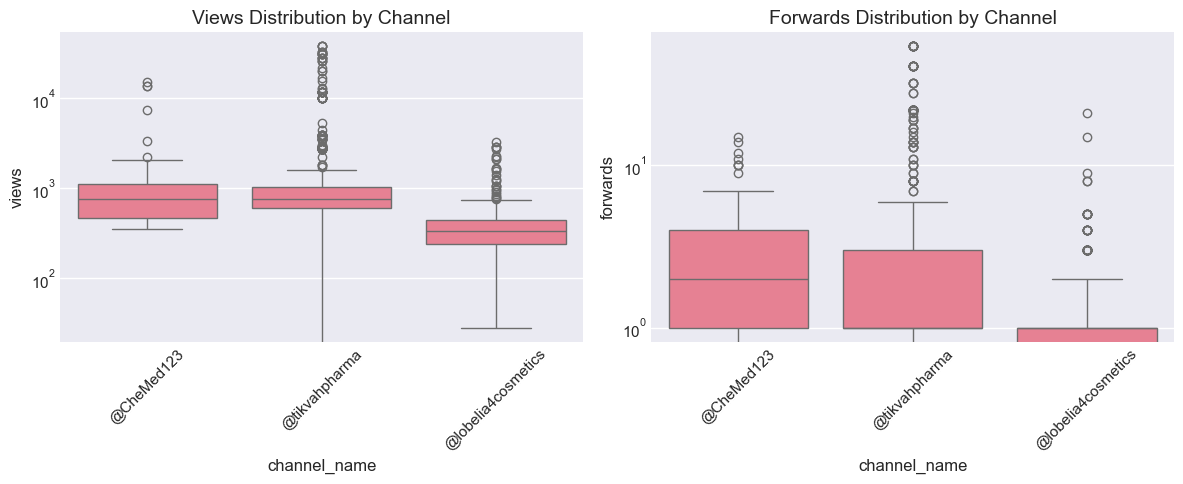

In [48]:
# Distribution of views
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='channel_name', y='views')
plt.title('Views Distribution by Channel', fontsize=14)
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale for better visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='channel_name', y='forwards')
plt.title('Forwards Distribution by Channel', fontsize=14)
plt.xticks(rotation=45)
plt.yscale('log')

plt.tight_layout()
plt.show()

## 5. Content Analysis

In [49]:
# Message length analysis
df['message_length'] = df['message_text'].str.len()

print("=== MESSAGE CONTENT ANALYSIS ===")
print(f"Average message length: {df['message_length'].mean():.0f} characters")
print(f"Shortest message: {df['message_length'].min()} characters")
print(f"Longest message: {df['message_length'].max()} characters")

# Media analysis
print("\n=== MEDIA ANALYSIS ===")
media_stats = df['has_media'].value_counts()
print(f"Messages with media: {media_stats.get(True, 0):,} ({media_stats.get(True, 0)/len(df)*100:.1f}%)")
print(f"Messages without media: {media_stats.get(False, 0):,} ({media_stats.get(False, 0)/len(df)*100:.1f}%)")

if 'media_type' in df.columns:
    print("\nMedia types distribution:")
    print(df['media_type'].value_counts(dropna=False))

=== MESSAGE CONTENT ANALYSIS ===
Average message length: 819 characters
Shortest message: 0 characters
Longest message: 4433 characters

=== MEDIA ANALYSIS ===
Messages with media: 796 (74.3%)
Messages without media: 275 (25.7%)

Media types distribution:
media_type
photo       746
None        321
document      4
Name: count, dtype: int64



Top 20 Most Frequent Words:
  birr: 1,665
  monday: 969
  vicryl: 900
  tube: 693
  price: 617
  round: 605
  tab: 600
  call: 598
  size: 596
  pharmacy: 585
  ecg: 577
  delivery: 565
  bole: 547
  telegram: 544
  paper: 510
  school: 505
  cosmetics: 500
  high: 490
  option: 488
  open: 487


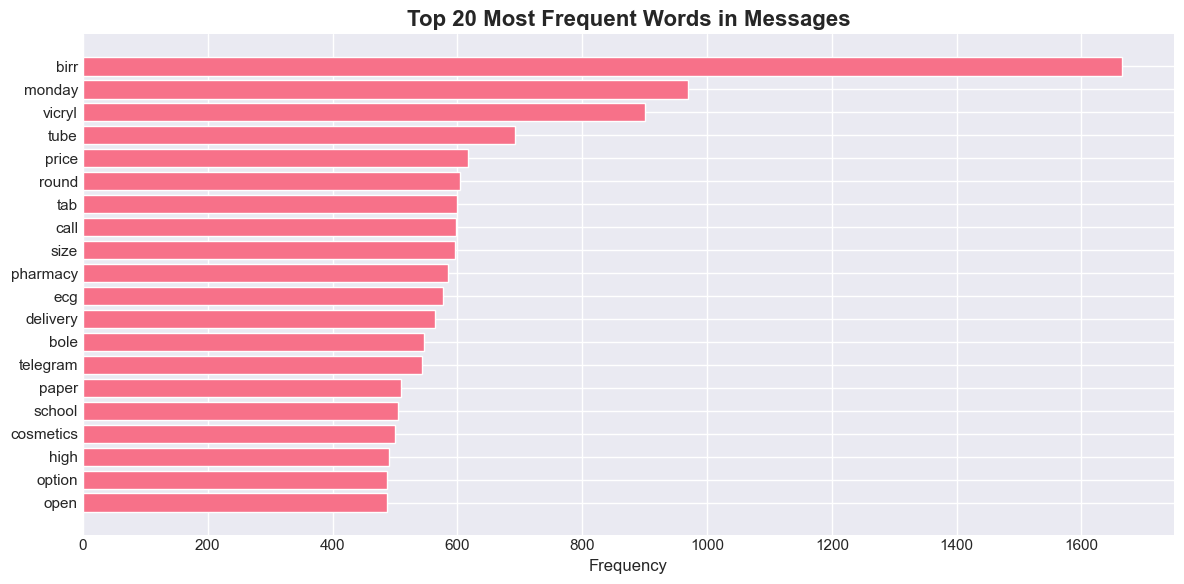

In [50]:
# Text analysis - most common words (excluding common stop words)
import re
from collections import Counter

def extract_words(text):
    """Extract words from text"""
    if not isinstance(text, str):
        return []
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    # Extract words
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    return words

# Common stop words (Amharic and English)
stop_words = set(['the', 'and', 'for', 'are', 'with', 'this', 'that', 'have', 'from', 'you', 'your', 'has', 'was', 'were',
                  'እና', 'የ', 'ን', 'በ', 'ላይ', 'ነው', 'ውስጥ', 'አለ', 'እንደ', 'ከ', 'ለ', 'ወደ', 'ባለ', 'ያለ', 'ነበር'])

# Count words across all messages
all_words = []
for text in df['message_text'].dropna():
    words = extract_words(text)
    filtered_words = [w for w in words if w not in stop_words]
    all_words.extend(filtered_words)

word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

print("\nTop 20 Most Frequent Words:")
for word, count in top_words:
    print(f"  {word}: {count:,}")

# Plot top words
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
bars = plt.barh(top_words_df['Word'], top_words_df['Count'])
plt.title('Top 20 Most Frequent Words in Messages', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Temporal Patterns

=== HOURLY POSTING PATTERNS ===


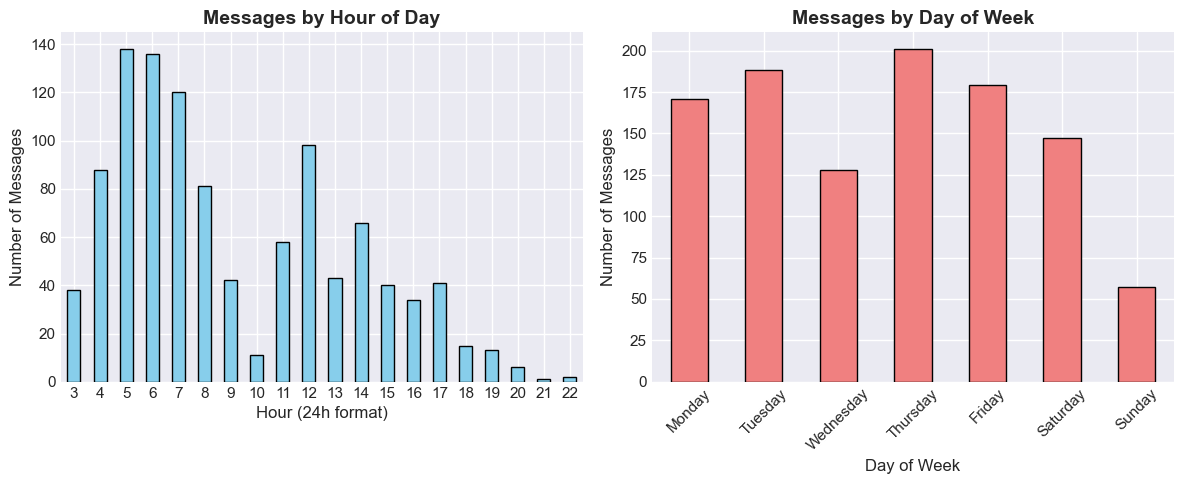

In [19]:
# Hourly posting patterns
print("=== HOURLY POSTING PATTERNS ===")
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Messages by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour (24h format)', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=0)

# Day of week patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.subplot(1, 2, 2)
daily_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Messages by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 7. Hashtag and Mention Analysis

=== HASHTAG ANALYSIS ===

Top 15 Most Used Hashtags:
  ##himed: 21
  #1. iv ca: 12
  #: 12
  ##የሞያ_ፈቃድ_ለማሳደስ_cpd_ይመዝገቡ: 7
  ##basic_abdominal_ultrasound_training: 6
  ##circumcision_skill_training_: 6
  #accredited : 6
  #elected h: 6
  #y : 6
  #ዮጵ: 6
  ##obgyn_ultrasound_training: 5
  #accredited): 5
  #ly: 5
  #ትዮ: 5
  #ከ_ጥር_4_ጀምሮ(: 4


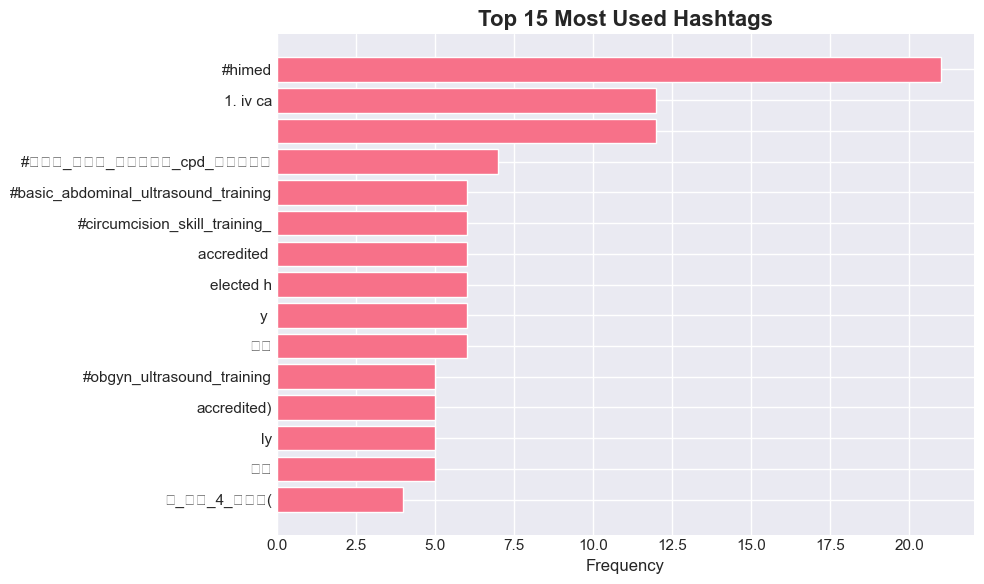

In [20]:
# Hashtag analysis
print("=== HASHTAG ANALYSIS ===")

# Extract all hashtags
all_hashtags = []
for hashtags in df['hashtags'].dropna():
    if isinstance(hashtags, list):
        all_hashtags.extend([tag.lower() for tag in hashtags if isinstance(tag, str)])

if all_hashtags:
    hashtag_counts = Counter(all_hashtags)
    top_hashtags = hashtag_counts.most_common(15)
    
    print("\nTop 15 Most Used Hashtags:")
    for tag, count in top_hashtags:
        print(f"  #{tag}: {count:,}")
    
    # Plot
    hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])
    plt.figure(figsize=(10, 6))
    bars = plt.barh(hashtags_df['Hashtag'], hashtags_df['Count'])
    plt.title('Top 15 Most Used Hashtags', fontsize=16, fontweight='bold')
    plt.xlabel('Frequency', fontsize=12)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No hashtags found in the data.")

## 9. Business Insights

In [52]:
print("=== BUSINESS INSIGHTS ===")

# 1. Most active channels
print("\n1. Channel Activity Ranking:")
for i, (channel, count) in enumerate(channel_stats.items(), 1):
    print(f"   {i}. {channel}: {count:,} messages ({count/len(df)*100:.1f}%)")

# 2. Best time to post
best_hour = hourly_counts.idxmax()
print(f"\n2. Best posting hour: {best_hour}:00 ({hourly_counts.max():,} messages)")

# 3. Engagement leaders
most_viewed = df.loc[df['views'].idxmax()]
most_forwarded = df.loc[df['forwards'].idxmax()]
print(f"\n3. Most viewed message: ")
print(f"   Channel: {most_viewed['channel_name']}")
print(f"   Views: {most_viewed['views']:,}")
print(f"   Text preview: {most_viewed['message_text'][:100]}...")

# 4. Media effectiveness
if 'has_media' in df.columns:
    media_engagement = df.groupby('has_media').agg({
        'views': 'mean',
        'forwards': 'mean',
        'message_id': 'count'
    }).rename(columns={'message_id': 'count'})
    print(f"\n4. Media vs Non-Media Engagement:")
    print(f"   Messages with media get {media_engagement.loc[True, 'views']/media_engagement.loc[False, 'views']:.1f}x more views")
    print(f"   Messages with media get {media_engagement.loc[True, 'forwards']/media_engagement.loc[False, 'forwards']:.1f}x more forwards")

# 5. Content length vs engagement
print(f"\n5. Content Length Correlation:")
corr_views = df['message_length'].corr(df['views'])
corr_forwards = df['message_length'].corr(df['forwards'])
print(f"   Length vs Views correlation: {corr_views:.3f}")
print(f"   Length vs Forwards correlation: {corr_forwards:.3f}")

=== BUSINESS INSIGHTS ===

1. Channel Activity Ranking:
   1. @lobelia4cosmetics: 500 messages (46.7%)
   2. @tikvahpharma: 499 messages (46.6%)
   3. @CheMed123: 72 messages (6.7%)

2. Best posting hour: 5:00 (138 messages)

3. Most viewed message: 
   Channel: @tikvahpharma
   Views: 37,908
   Text preview: **#OBGYN_Ultrasound_Training****
****@Hawassa****(OBGYN)📌
****#ከ_ጥር_4_ጀምሮ****(****#Accredited****)
-...

4. Media vs Non-Media Engagement:
   Messages with media get 2.6x more views
   Messages with media get 2.3x more forwards

5. Content Length Correlation:
   Length vs Views correlation: 0.019
   Length vs Forwards correlation: 0.071


## 10. Recommendations for Data Modeling

In [53]:
print("=== RECOMMENDATIONS FOR TASK 2: DATA MODELING ===")
print("""
Based on EDA, here are recommendations for the data warehouse design:

1. DIMENSION TABLES:
   - dim_channels: Channel metadata, activity stats
   - dim_dates: Full date hierarchy for time analysis
   - dim_time: Hour-level analysis for posting patterns
   - dim_hashtags: Hashtag dictionary for trend analysis

2. FACT TABLES:
   - fct_messages: Core message facts with engagement metrics
   - fct_media: Media-specific facts and performance
   - fct_engagement: Hourly/daily engagement trends

3. DATA CLEANING NEEDED:
   - Handle missing message dates
   - Remove duplicates (if any)
   - Validate view/forward counts (non-negative)
   - Standardize text encoding (UTF-8 for Amharic)

4. BUSINESS METRICS TO TRACK:
   - Daily Active Channels
   - Engagement Rate (views/message)
   - Virality Score (forwards/views)
   - Content Effectiveness (media vs text)
   - Peak Posting Times

5. STAR SCHEMA DESIGN:
   - Single fact table with degenerate dimensions for efficiency
   - Slowly Changing Dimension for channel metadata
   - Aggregate tables for common queries (daily stats)
""")

=== RECOMMENDATIONS FOR TASK 2: DATA MODELING ===

Based on EDA, here are recommendations for the data warehouse design:

1. DIMENSION TABLES:
   - dim_channels: Channel metadata, activity stats
   - dim_dates: Full date hierarchy for time analysis
   - dim_time: Hour-level analysis for posting patterns
   - dim_hashtags: Hashtag dictionary for trend analysis

2. FACT TABLES:
   - fct_messages: Core message facts with engagement metrics
   - fct_media: Media-specific facts and performance
   - fct_engagement: Hourly/daily engagement trends

3. DATA CLEANING NEEDED:
   - Handle missing message dates
   - Remove duplicates (if any)
   - Validate view/forward counts (non-negative)
   - Standardize text encoding (UTF-8 for Amharic)

4. BUSINESS METRICS TO TRACK:
   - Daily Active Channels
   - Engagement Rate (views/message)
   - Virality Score (forwards/views)
   - Content Effectiveness (media vs text)
   - Peak Posting Times

5. STAR SCHEMA DESIGN:
   - Single fact table with degenerate 

## Summary

In [55]:
print("=== TASK 1: DATA SCRAPING SUMMARY ===")
print(f"""
✅ SUCCESSFULLY COMPLETED:
- Scraped {len(df):,} messages from {df['channel_name'].nunique()} channels
- Created {len(json_files)} JSON files with date partitioning
- Downloaded images organized by channel
- Comprehensive logging implemented

📊 DATA CHARACTERISTICS:
- Date range: {df['message_date'].min().date()} to {df['message_date'].max().date()}
- Channels: {', '.join(df['channel_name'].unique())}
- Total views: {df['views'].sum():,}
- Total forwards: {df['forwards'].sum():,}
- Media content: {df['has_media'].sum():,} messages ({df['has_media'].sum()/len(df)*100:.1f}%)

🚀 READY FOR TASK 2:
- Raw data is clean and structured
- Ready for PostgreSQL loading
- dbt models can be designed based on EDA insights
- Business questions identified for analytical API
""")

=== TASK 1: DATA SCRAPING SUMMARY ===

✅ SUCCESSFULLY COMPLETED:
- Scraped 1,071 messages from 3 channels
- Created 101 JSON files with date partitioning
- Downloaded images organized by channel
- Comprehensive logging implemented

📊 DATA CHARACTERISTICS:
- Date range: 2022-09-05 to 2026-01-17
- Channels: @CheMed123, @tikvahpharma, @lobelia4cosmetics
- Total views: 1,697,795
- Total forwards: 3,786
- Media content: 796 messages (74.3%)

🚀 READY FOR TASK 2:
- Raw data is clean and structured
- Ready for PostgreSQL loading
- dbt models can be designed based on EDA insights
- Business questions identified for analytical API

